In [1]:
!pip install pandas psycopg2-binary sqlalchemy matplotlib

In [2]:
import pandas as pd
import psycopg2 as db
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

In [3]:
db_type = 'postgresql'
host = 'database'
port = 5432
db_name = os.environ.get('POSTGRES_DB')
user = os.environ.get('POSTGRES_USER')
password = os.environ.get('POSTGRES_PASSWORD')

conn_uri = f"{db_type}://{user}:{password}@{host}:{port}/{db_name}"
alchemyEngine = create_engine(conn_uri)
db_conn = alchemyEngine.connect();

In [4]:
""" Playgound"""
db_conn = alchemyEngine.connect();
query = """
    SELECT event_type, COUNT(*)
    FROM customers
    GROUP BY event_type
"""
df = pd.read_sql(query, db_conn)
# print(df.describe())
df.head()

,event_type,count
0,cart,4392838
1,purchase,1044131
2,remove_from_cart,2196659
3,view,7682377


In [5]:
""" Show Stat """
db_conn = alchemyEngine.connect();
query = """
    SELECT price
    FROM customers
    WHERE event_type = 'purchase'
        AND event_time between '2022-10-01' AND '2023-02-28'
"""
df = pd.read_sql(query, db_conn)
print(df.describe().apply(lambda s: s.apply('{0:.5f}'.format)))

               price
count  1044131.00000
mean         4.92108
std          8.85439
min        -79.37000
25%          1.59000
50%          3.00000
75%          5.40000
max        327.78000


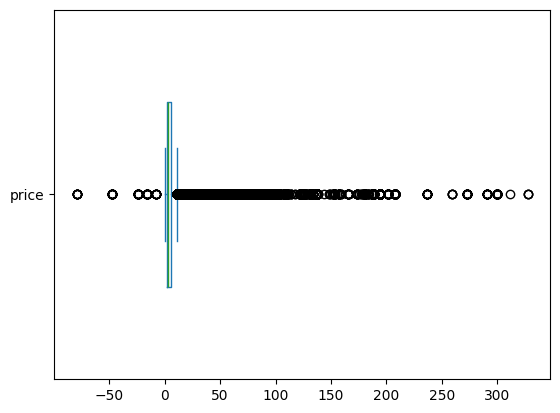

In [10]:
""" Box Plot """
db_conn = alchemyEngine.connect();
query = """
    SELECT event_time, price
    FROM customers
    WHERE event_type = 'purchase'
        AND event_time between '2022-10-01' AND '2023-02-28'
"""
df = pd.read_sql(query, db_conn)
ax = df.plot(
    kind='box',
    column='price',
    vert=False,
    # xlim=(-2, 14)
    widths=0.5
)
plt.show()

             avg
count  123.00000
mean    40.69282
std      2.84466
min     33.69557
25%     39.09366
50%     40.83460
75%     42.50083
max     53.30081


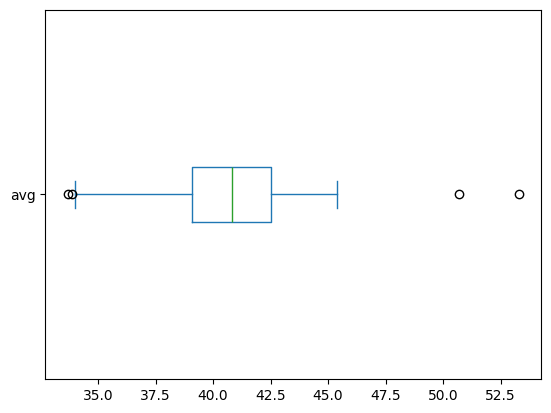

In [7]:
""" Average basket price per user """
query = """
    SELECT AVG(purchase) as avg, date
    FROM (
        SELECT
            event_time::date AS date,
            user_id AS uid,
            SUM(price) AS purchase
        FROM customers
        WHERE event_time between '2022-10-01' AND '2023-02-28'
            AND event_type = 'purchase'
        GROUP BY date, user_id
        ORDER BY date ASC
    )
    GROUP BY date
    ORDER BY date ASC
"""
df = pd.read_sql(query, db_conn)
print(df.describe().apply(lambda s: s.apply('{0:.5f}'.format)))
ax = df.plot(
    kind='box',
    column='avg',
    vert=False,
)
plt.show()